In [2]:
import pandas as pd

In [8]:
df= pd.read_csv("/content/Housing.csv")

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
X = df.drop('price', axis=1)
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression


In [27]:
LR=LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = LR.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
print( r2_score(y_test, y_pred))
print( mean_squared_error(y_test, y_pred))

0.6494754192267803
1771751116594.0352


In [38]:
for feature, coef in zip(X.columns, LR.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercept: {LR.intercept_:.2f}")

area: 235.85
bedrooms: 78574.49
bathrooms: 1097117.27
stories: 406223.16
mainroad: 366824.19
guestroom: 233146.77
basement: 393159.78
hotwaterheating: 687881.31
airconditioning: 785550.58
parking: 225756.51
prefarea: 629901.66
furnishingstatus: -210397.12

Intercept: 293083.07


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}



In [56]:
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [57]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [58]:
print("Tuned R²:", r2_score(y_test, y_pred_best))

Tuned R²: 0.592034042824092


In [60]:
RF= RandomForestRegressor(random_state=42)
RF.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
y_predRF= RF.predict(X_test)

In [62]:
print(r2_score(y_test, y_predRF))
print( mean_squared_error(y_test, y_predRF))

0.6115321143409216
1963538216518.6526


In [64]:
importances = RF.feature_importances_
features = X_train.columns



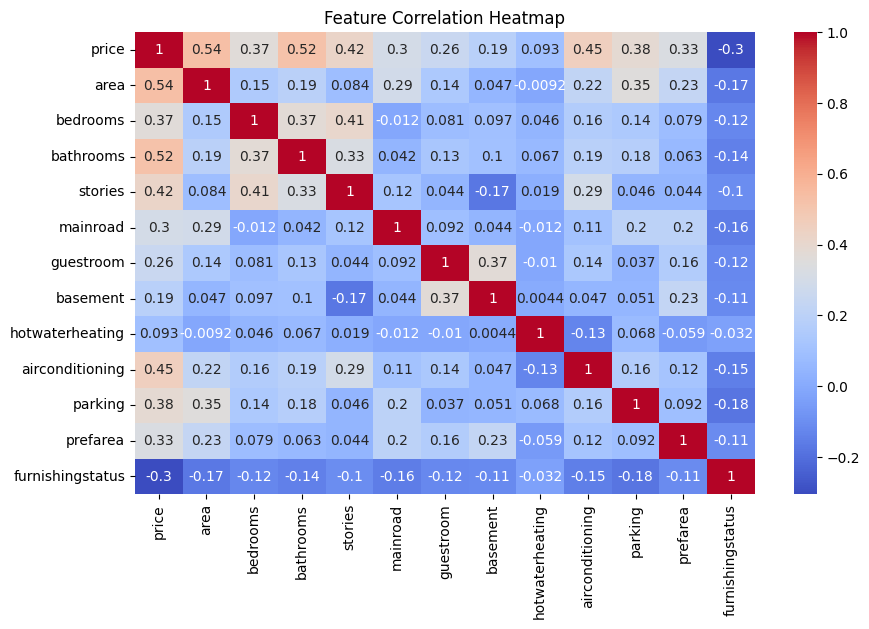

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()